# C.2.3 Position Vector
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## 2.3.1 Position
The position is the location of a point within a certain reference frame or coordinate system and is specified by a set of numbers indicating the distance from the origin of the frame. As we saw in PHASE D, x = 3 m describes the point in a 1D Cartesian coordinate system that is 3 meters away from the origin in the positive direction. For a 2D system, we will need two numbers to describe a point: example $(x,y) = (3~\textrm{m},4~\textrm{m})$ is the point that is 3 meters away from the origin along the positive $x$-axis and 4 meters away from the origin along the positive $y$-axis.

### Example: Plotting 2D Cartesian Reference Frame and Point Position
We can make a plot to create a visual interpretation of a reference frame and a point (using Python script below). In the first example, we have a 2D Cartesian reference frame and two points given by $(x_1,y_1) = (3~\textrm{m},4~\textrm{m})$ and $(x_2,y_2) = (-2~\textrm{m},-1~\textrm{m})$

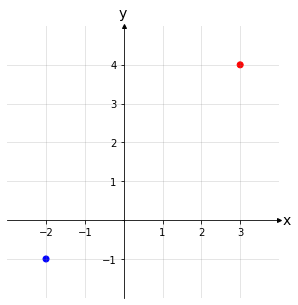

In [1]:
import numpy as np                 
import matplotlib.pyplot as plt    

# enter the x- and y-values of two data points
xs = [3,-2]
ys = [4,-1]

# make them different colors in the plot
colors = ['r', 'b']

# Plot points
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(xs, ys, c=colors)

# Draw lines connecting points to axes
#for x, y, c in zip(xs, ys, colors):
#    ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
#    ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)

#Set axes scales
xmin = np.min(xs)
xmax = np.max(xs)
ymin = np.min(ys)
ymax = np.max(ys)
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# By default there is a box around a plot. These lines are called spines.
# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create labels and place them at the end of the axes
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
# frequency of tick labels
ticks_frequency = 1
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect if ticks_frequency=1
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()

### Example: Plotting 2D Polar Reference Frame and Point Position
In a polar reference frame, the position is given by a set of numbers (r,$\theta$) indicating the distance away from the origin and the angle of rotation away from the positive x-axis (or horizontal axis). Example (r,$\theta$) = (3 m,$\frac{\pi}{4}$ rad), where the angle here is given in radians. 

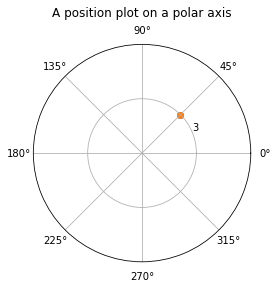

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = 3
theta = np.pi / 4.

ax = plt.subplot(111, projection='polar')
ax.scatter(theta, r)
ax.set_rmax(r+1)
ax.set_rticks([1, 2, 3, 4])  # Less radial ticks
ax.scatter(theta, r)
ax.set_title("A position plot on a polar axis", va='bottom')
plt.show()

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

## 2.3.2 Position Vector 
The position vector is the first vector we encounter in our physics course. Consider a 1D number line (1D Cartesian reference frame with units of meters), where we consider a point $x_A = +3$ m. The directed line segment pointing <b>from</b> $x = 0$ <b>to</b> $x_A$ is a vector $\vec{x}_{A}$. We refer to this vector as the <span style="color:red">position vector</span> for point A.

<img src="C2-fig3.png"  width="600"/>

<div class="alert alert-info">The position vector is the directed line segment from the origin of a given reference system to a point in the coordinate space.
</div>

NOTE: if we pursue further knowledge in algebra, we will learn that the position vector is not a true vector, but a quantity known as a <i>pseudo vector</i>. 

To fully explore vector nature, we will establish a 2D reference system, where we consider a point $A$ located at $(x, y) = (3,4)$, specified in some sort of distance unit. The <b>directed line segment</b> pointing from $(x, y) = (0, 0)$ to  $A$ is a position vector $\vec{r}_{A}$. 

<img src="C2-fig4.png"  width="600"/>

### Position Vectors Using Python
We can write a small Python script to plot a vector for us (for those of you interested in it): 

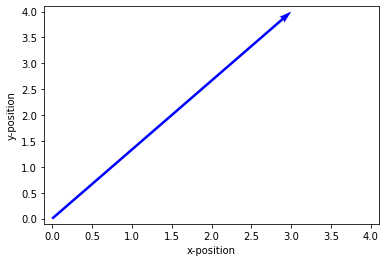

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

vec = [3,4]
array = np.array([[0, 0, vec[0], vec[1]]])
X, Y, U, V = zip(*array)

plt.figure()
plt.ylabel('y-position')
plt.xlabel('x-position')
ax = plt.gca()
ax.quiver(X, Y, U, V,color='b', angles='xy', scale_units='xy',scale=1)
ax.set_xlim([np.min(array)-0.1, np.max(array)+0.1])
ax.set_ylim([np.min(array)-0.1, np.max(array)+0.1])
plt.draw()
plt.show()

Below is a code that can plot two position vectors. This code is a little more complex, but if we wanted to plot many position vectors, this code would be more appropriate to use as a starting point.

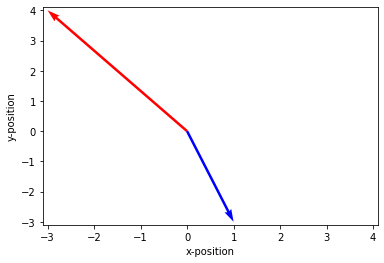

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw(v1, v2): 
    array = np.array([[0, 0, v1[0], v1[1]], 
                      [0,0, v2[0], v2[1]]])
    X, Y, U, V = zip(*array)
    plt.figure()
    plt.ylabel('y-position')
    plt.xlabel('x-position')
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy',color=['r','b'], scale=1)
    ax.set_xlim([np.min(array)-0.1, np.max(array)+0.1])
    ax.set_ylim([np.min(array)-0.1, np.max(array)+0.1])
    plt.draw()
    plt.show()
    
draw([-3,4],[1,-3])

<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<div style="background-color: #D0D0D0 ; padding: 10px; border: 1px solid black;">
<header>
<h3> Example 1</h3>
    </header>
    
<b>Problem</b>
    <br>
Make a sketch of two position vectors representative of the positions
    
$$ \vec{r}_1 = (-3,-1) $$
    
and

$$ \vec{r}_2 = (1,4) $$
    
<b>Methodology</b>
    <br>
We will mark the two data points in a 2D Cartesion coordinate system and draw a **directed line segment** from the origin to each data point.

<b>Solution</b>
    <br>
<img src="C2-fig5.png"  width="600"/>
    </div>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">